# Generate Custom Images with Stable Diffusion

In [4]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load model (example: Stable Diffusion v1.5)
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
).to("cpu")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
prompts = [
    "A bustling market at dawn with vibrant stalls",
    "A whimsical landscape with floating islands and waterfalls",
]

  0%|          | 0/30 [00:00<?, ?it/s]

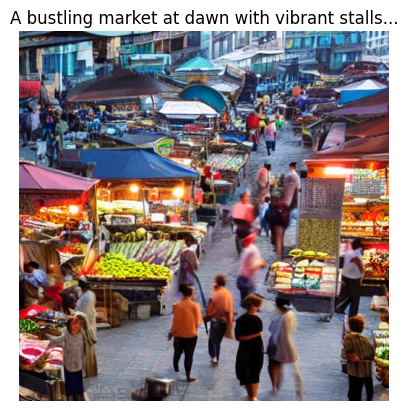

  0%|          | 0/30 [00:00<?, ?it/s]

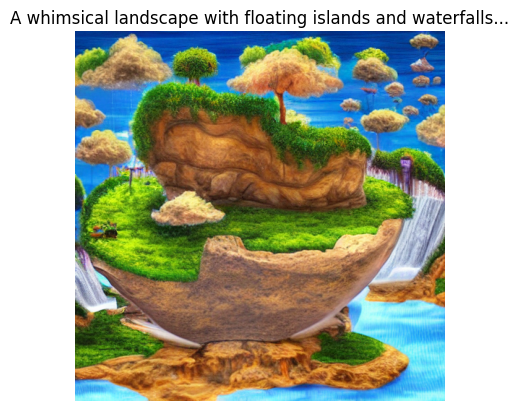

In [8]:
def generate_and_show(prompt, guidance=7.5, steps=30):
    image = pipe(prompt, guidance_scale=guidance, num_inference_steps=steps).images[0]
    plt.imshow(image)
    plt.title(prompt[:60] + "...")
    plt.axis("off")
    plt.show()

for p in prompts:
    generate_and_show(p)

=== GUIDANCE SCALE EXPERIMENT ===


  0%|          | 0/30 [00:00<?, ?it/s]

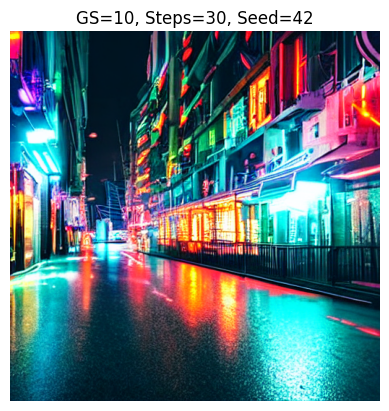

  0%|          | 0/30 [00:00<?, ?it/s]

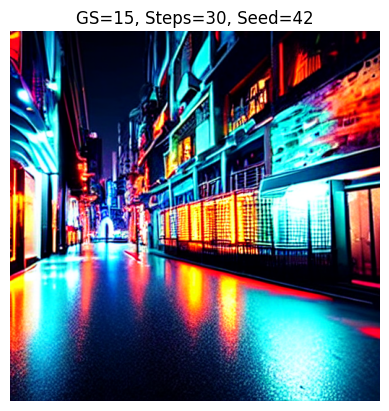

  0%|          | 0/30 [00:00<?, ?it/s]

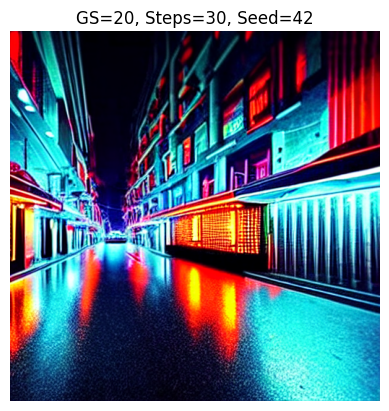

=== SEED VARIATION EXPERIMENT ===


  0%|          | 0/30 [00:00<?, ?it/s]

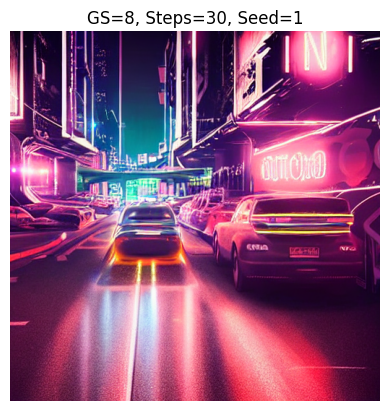

  0%|          | 0/30 [00:00<?, ?it/s]

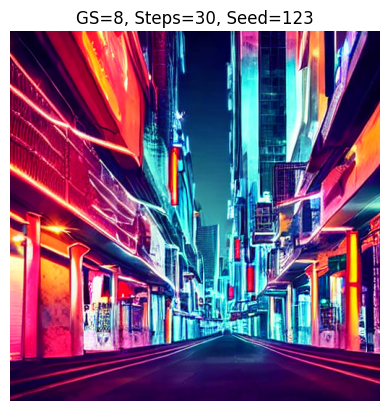

  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
# Parameter Exploration

# Helper: generate and display image
def generate_image(prompt, guidance, steps, seed):
    generator = torch.manual_seed(seed)
    image = pipe(
        prompt,
        guidance_scale=guidance,
        num_inference_steps=steps,
        generator=generator
    ).images[0]

    plt.imshow(image)
    plt.title(f"GS={guidance}, Steps={steps}, Seed={seed}")
    plt.axis("off")
    plt.show()

# Prompt for testing
prompt = "A futuristic neon-lit city street at night, cinematic atmosphere"

# 1. GUIDANCE SCALE EXPERIMENT

guidance_values = [5, 10, 15, 20]

print("=== GUIDANCE SCALE EXPERIMENT ===")
for g in guidance_values:
    generate_image(prompt, guidance=g, steps=30, seed=42)

# 2. SEED VARIATION EXPERIMENT

seed_values = [1, 42, 123, 999]

print("=== SEED VARIATION EXPERIMENT ===")
for s in seed_values:
    generate_image(prompt, guidance=8, steps=30, seed=s)

# 3. STEP COUNT EXPERIMENT

step_values = [10, 20, 40, 60]

print("=== STEP COUNT EXPERIMENT ===")
for st in step_values:
    generate_image(prompt, guidance=8, steps=st, seed=42)